In [1]:
# # 시각화 한글 표시
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumBarunGothic')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 및 특정 문자 깨짐 문제 해결
import koreanize_matplotlib # 시본의 한글 깨짐은 해결못하지만, - 깨짐 해결

from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [3]:
# 주의 메시지 숨기기
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('data/trade_apt_api_2023_address.txt', sep='\t')
df['거래금액'] = df['거래금액'].str.replace(',', '').str.replace(' ', '').astype(int)
df.head()

,기준년월,지역명,지역코드,법정동,아파트,거래금액,년,월,일,건축년도,전용면적,지번,층
0,202306,종로구,11110,사직동,광화문스페이스본(101동~105동),138000,2023,6,9,2008,95.880,9,9
1,202306,종로구,11110,사직동,광화문스페이스본(101동~105동),170000,2023,6,10,2008,146.920,9,8
2,202306,종로구,11110,사직동,사직아파트,84000,2023,6,12,1970,116.230,1-8,6
3,202306,종로구,11110,당주동,롯데미도파광화문빌딩,93000,2023,6,20,1981,149.950,145,9
4,202306,종로구,11110,신문로2가,디팰리스,408000,2023,6,24,2020,148.111,171,10


In [5]:
df.describe()

,기준년월,지역코드,거래금액,년,월,일,건축년도,전용면적,층
count,2302.000000,2302.000000,2.302000e+03,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000
mean,202261.738923,11607.697654,1.919084e+05,2022.571242,4.614683,16.168115,2001.136838,81.173045,9.668983
std,48.717547,189.737573,1.315151e+05,0.495006,2.474663,8.576874,12.163308,46.020959,7.153552
min,202201.000000,11110.000000,9.500000e+03,2022.000000,1.000000,1.000000,1966.000000,12.010000,-1.000000
25%,202206.000000,11680.000000,9.600000e+04,2022.000000,3.000000,9.000000,1992.000000,49.460475,5.000000
50%,202302.000000,11680.000000,1.800000e+05,2023.000000,4.000000,16.000000,2003.000000,80.130000,8.000000
75%,202304.000000,11680.000000,2.527500e+05,2023.000000,6.000000,23.000000,2011.000000,101.988550,13.000000
max,202306.000000,11680.000000,1.450000e+06,2023.000000,12.000000,31.000000,2023.000000,301.470000,64.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    2302 non-null   int64  
 1   지역명     2302 non-null   object 
 2   지역코드    2302 non-null   int64  
 3   법정동     2302 non-null   object 
 4   아파트     2302 non-null   object 
 5   거래금액    2302 non-null   int32  
 6   년       2302 non-null   int64  
 7   월       2302 non-null   int64  
 8   일       2302 non-null   int64  
 9   건축년도    2302 non-null   int64  
 10  전용면적    2302 non-null   float64
 11  지번      2302 non-null   object 
 12  층       2302 non-null   int64  
dtypes: float64(1), int32(1), int64(7), object(4)
memory usage: 224.9+ KB


# 히스토그램 : 거래금액, 층, 전용면적, 건축년도

In [7]:
data1 = df['거래금액']
data2 = df['층']
data3 = df['전용면적']
data4 = df['건축년도']

In [8]:
data1.values

array([138000, 170000,  84000, ...,  37400, 281000, 420000])

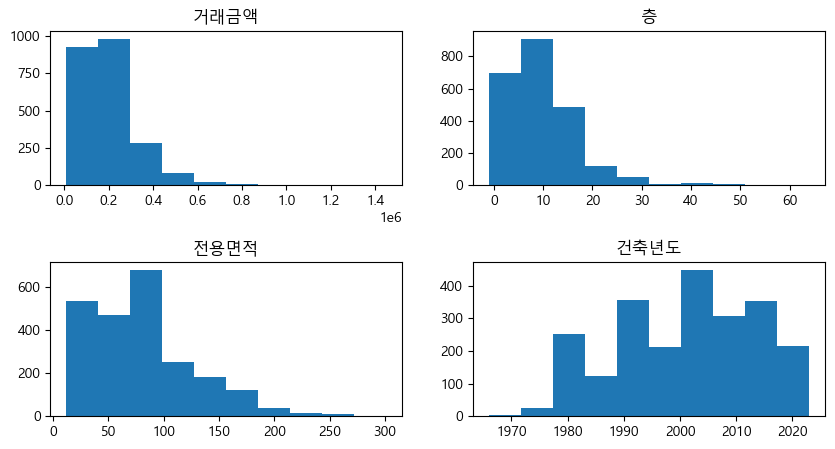

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
axs[0,0].hist(data1.values, bins=10)
axs[0,0].set_title('거래금액')

axs[0,1].hist(data2.values, bins=10)
axs[0,1].set_title('층')

axs[1,0].hist(data3.values, bins=10)
axs[1,0].set_title('전용면적')

axs[1,1].hist(data4.values, bins=10)
axs[1,1].set_title('건축년도')

fig.subplots_adjust(hspace=0.5)
plt.show()

# 파이차트

In [10]:
df_sum = df.groupby('지역명')['거래금액'].sum()
df_sum

지역명
강남구    415706750
종로구     26066477
Name: 거래금액, dtype: int32

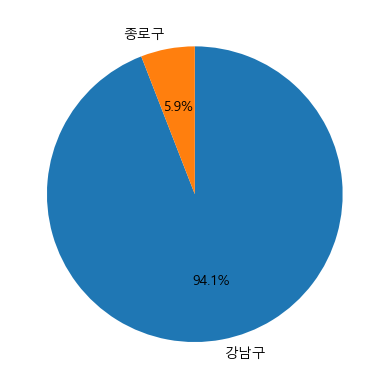

In [11]:
plt.pie(df_sum.values, labels = df_sum.index, autopct='%.1f%%', startangle=90, counterclock=False)
plt.show()

In [12]:
df_mean = df.groupby('지역명')['거래금액'].mean()
df_mean

지역명
강남구    206819.278607
종로구     89268.756849
Name: 거래금액, dtype: float64

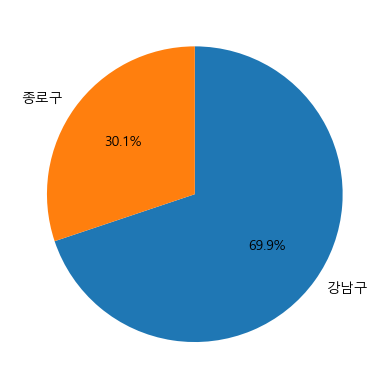

In [13]:
plt.pie(df_mean.values, labels = df_mean.index, autopct='%.1f%%', startangle=90, counterclock=False)
plt.show()

# boxplot

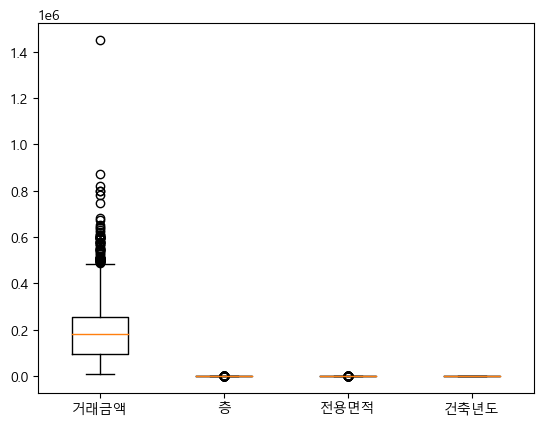

In [14]:
plt.boxplot([data1, data2, data3, data4])
plt.xticks(np.arange(1, 5), labels=['거래금액', '층', '전용면적', '건축년도'])

plt.show()

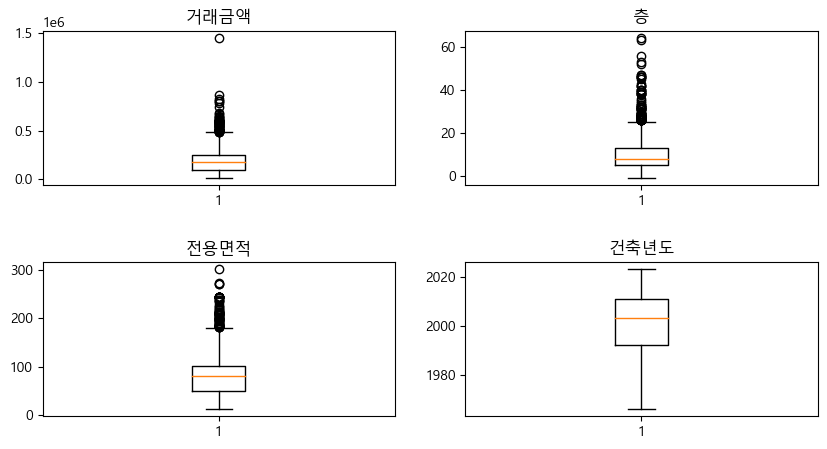

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

axs[0,0].boxplot(data1.values)
axs[0,0].set_title('거래금액')

axs[0,1].boxplot(data2.values)
axs[0,1].set_title('층')

axs[1,0].boxplot(data3.values)
axs[1,0].set_title('전용면적')

axs[1,1].boxplot(data4.values)
axs[1,1].set_title('건축년도')

fig.subplots_adjust(hspace=0.5)
plt.show()

# 막대차트

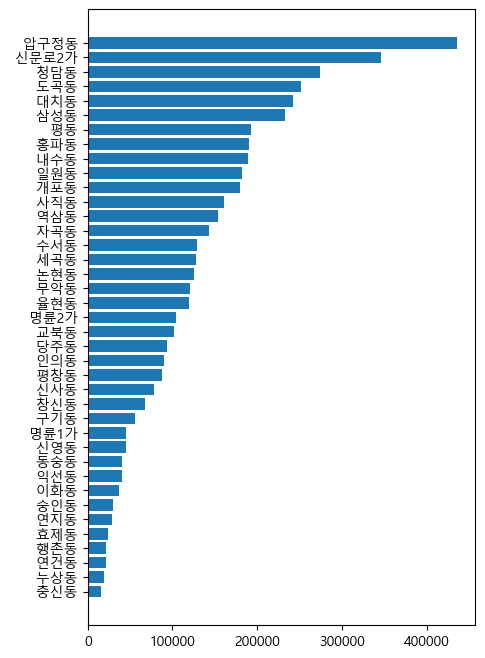

In [16]:
df_mean = df.groupby('법정동')['거래금액'].mean().sort_values(ascending=True)
plt.figure(figsize=(5, 8))
plt.barh(df_mean.index, df_mean.values)
plt.show()

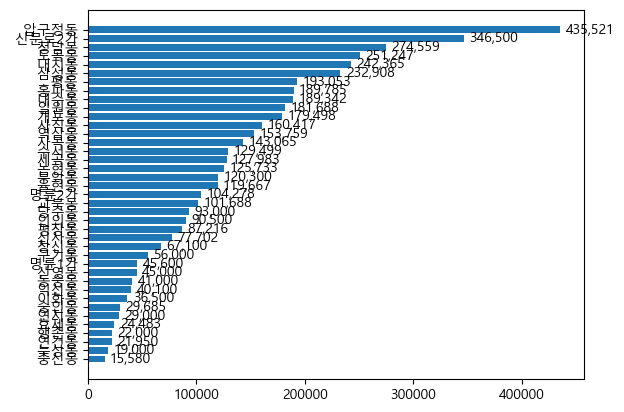

In [17]:
bars = plt.barh(df_mean.index, df_mean.values)

for bar in bars:
    width = bar.get_width()
    plt.text(width+5000,
             bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}',
             ha='left',
             va='center')
plt.show()

# 산점도

In [20]:
# from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
# font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
# font = font_manager.FontProperties(fname = font_path).get_name()
# rc('font', family = font)

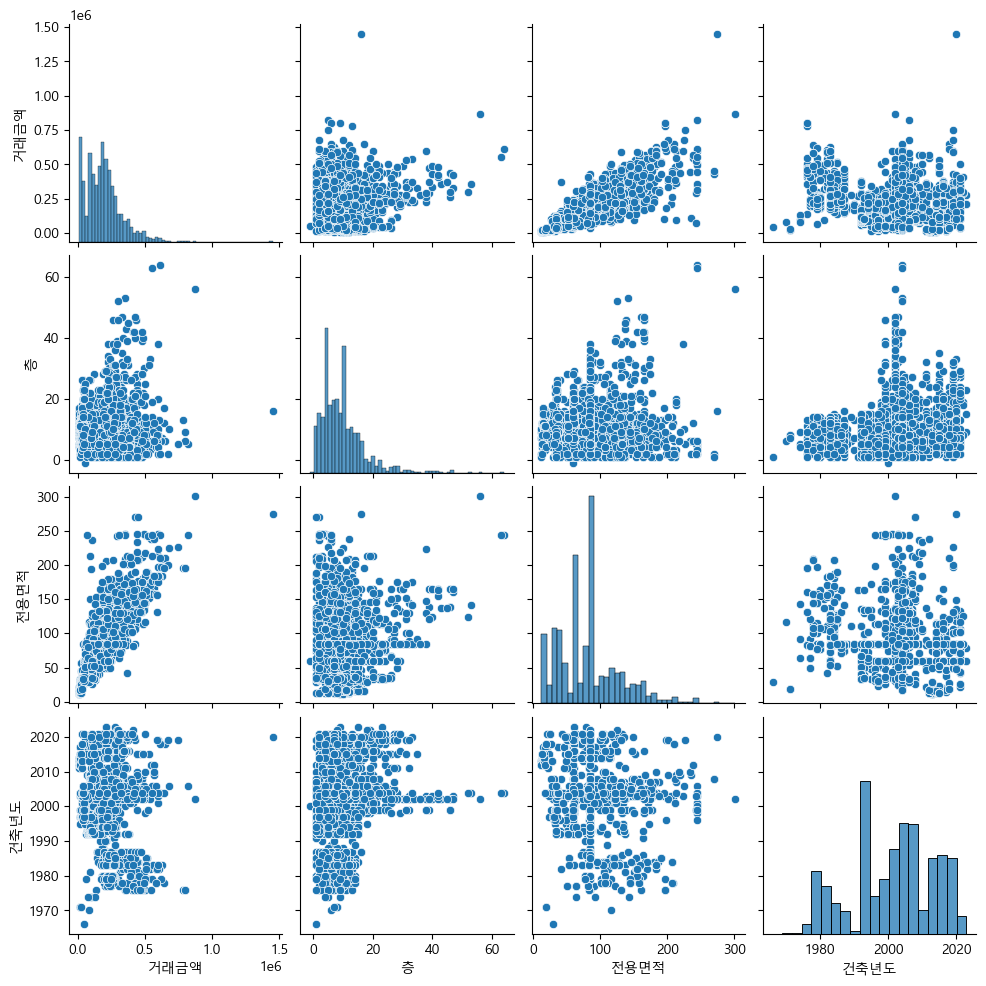

In [18]:
# sns.set_theme(style="ticks") # 테마 적용하면 한글적용이 풀림

df_num = df[['거래금액', '층', '전용면적', '건축년도']]
sns.pairplot(df_num)
plt.show()

# 히트맵

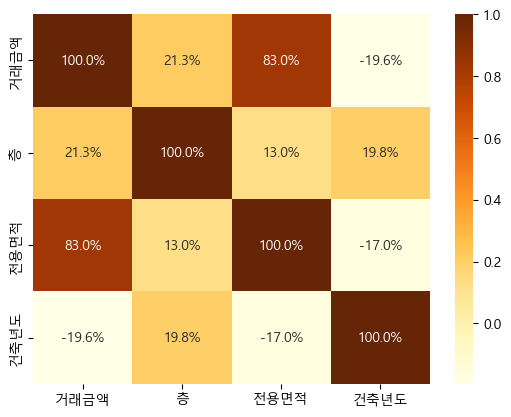

In [19]:
corr = df_num.corr()
sns.heatmap(corr, annot=True, fmt=".1%", cmap='YlOrBr')
plt.show()